# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 605


['isafjordur',
 'gazojak',
 'port mathurin',
 'jamestown',
 'adamstown',
 'ust-nera',
 'hadibu',
 'waitangi',
 'margine coperta-traversagna',
 'stanovoye',
 'kaveripatnam',
 'saldanha',
 'ribeira grande',
 'sampit',
 'bilibino',
 'georgetown',
 'howrah',
 'summerside',
 'stanley',
 'murzuq',
 'blackmans bay',
 'puerto natales',
 'luanda',
 'poronaysk',
 'xapuri',
 'lebu',
 'albany',
 'avarua',
 'port elizabeth',
 'molteno',
 'campbell river',
 'port douglas',
 'hermanus',
 'lata',
 'edinburgh of the seven seas',
 'fale old settlement',
 'jinka',
 'whitehorse',
 'papatowai',
 'chinsali',
 'gebeit',
 'laminusa',
 'sao miguel do araguaia',
 'coahuayana de hidalgo',
 'bredasdorp',
 'zhaoyuan',
 'santana',
 'dabeiba',
 'grytviken',
 'urucara',
 'nogliki',
 'chibougamau',
 'ushibukamachi',
 'sur',
 'ryotsu-minato',
 'kodiak',
 'ushuaia',
 'badger',
 'miasskoye',
 'lerwick',
 'kabompo',
 'spring creek',
 'ulsteinvik',
 'san pedro pochutla',
 'yellowknife',
 'tirano',
 'alotau',
 'augustow',
 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid="+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | gazojak
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | hadibu
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | margine coperta-traversagna
City not found. Skipping...
Processing Record 10 of Set 1 | stanovoye
Processing Record 11 of Set 1 | kaveripatnam
Processing Record 12 of Set 1 | saldanha
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | sampit
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | howrah
Processing Record 18 of Set 1 | summerside
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | murzuq
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 o

In [12]:
city_data

[{'City': 'isafjordur',
  'Lat': 66.0755,
  'Lng': -23.124,
  'Max Temp': 279.46,
  'Humidity': 93,
  'Cloudiness': 100,
  'Wind Speed': 7.86,
  'Country': 'IS',
  'Date': 1689310428},
 {'City': 'gazojak',
  'Lat': 41.1875,
  'Lng': 61.4036,
  'Max Temp': 305.82,
  'Humidity': 18,
  'Cloudiness': 0,
  'Wind Speed': 4.47,
  'Country': 'TM',
  'Date': 1689310428},
 {'City': 'port mathurin',
  'Lat': -19.6833,
  'Lng': 63.4167,
  'Max Temp': 297.19,
  'Humidity': 81,
  'Cloudiness': 86,
  'Wind Speed': 7.35,
  'Country': 'MU',
  'Date': 1689310428},
 {'City': 'jamestown',
  'Lat': 42.097,
  'Lng': -79.2353,
  'Max Temp': 289.83,
  'Humidity': 96,
  'Cloudiness': 0,
  'Wind Speed': 0.45,
  'Country': 'US',
  'Date': 1689310274},
 {'City': 'adamstown',
  'Lat': -25.066,
  'Lng': -130.1015,
  'Max Temp': 294.34,
  'Humidity': 78,
  'Cloudiness': 12,
  'Wind Speed': 3.06,
  'Country': 'PN',
  'Date': 1689310429},
 {'City': 'ust-nera',
  'Lat': 64.5667,
  'Lng': 143.2,
  'Max Temp': 299.45,
  

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])


# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,279.46,93,100,7.86,IS,1689310428
1,gazojak,41.1875,61.4036,305.82,18,0,4.47,TM,1689310428
2,port mathurin,-19.6833,63.4167,297.19,81,86,7.35,MU,1689310428
3,jamestown,42.0970,-79.2353,289.83,96,0,0.45,US,1689310274
4,adamstown,-25.0660,-130.1015,294.34,78,12,3.06,PN,1689310429


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,279.46,93,100,7.86,IS,1689310428
1,gazojak,41.1875,61.4036,305.82,18,0,4.47,TM,1689310428
2,port mathurin,-19.6833,63.4167,297.19,81,86,7.35,MU,1689310428
3,jamestown,42.0970,-79.2353,289.83,96,0,0.45,US,1689310274
4,adamstown,-25.0660,-130.1015,294.34,78,12,3.06,PN,1689310429


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

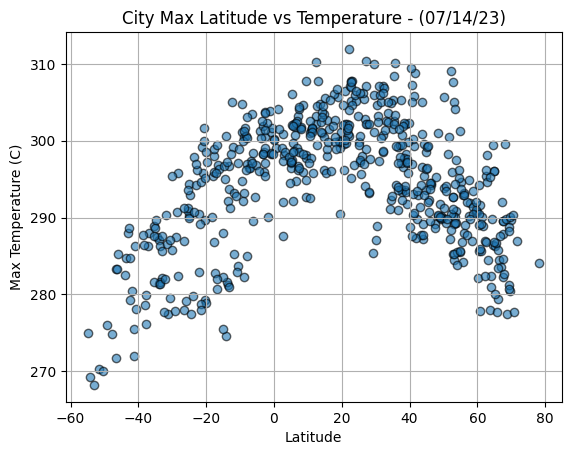

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=.6, edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs Temperature - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

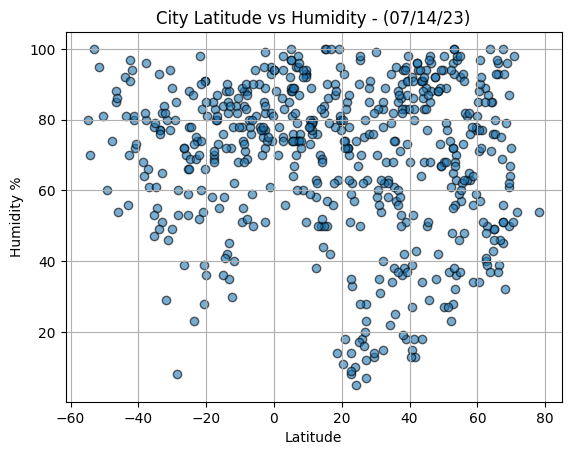

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=.6, edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

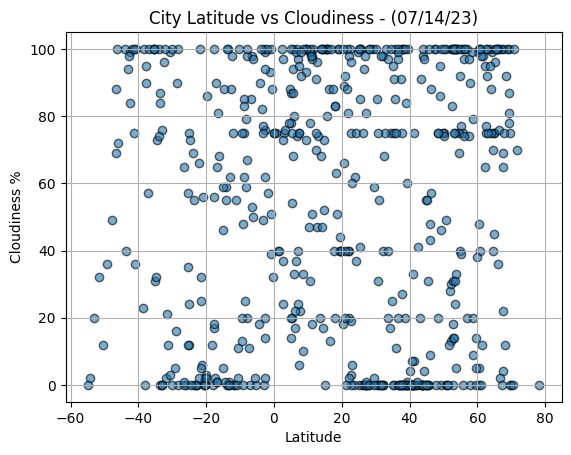

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=.6, edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

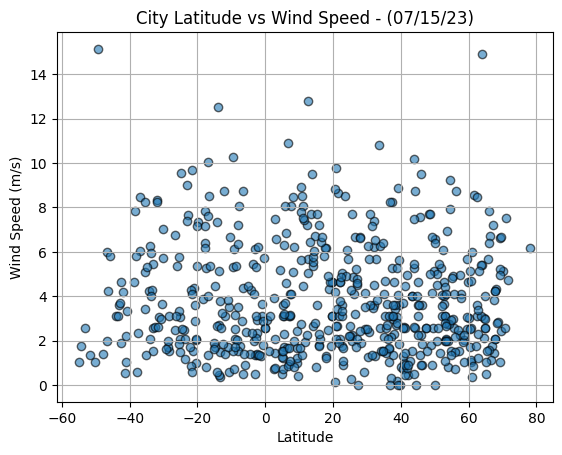

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=.6, edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed - ({time.strftime('%D')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def f_linear_regression_plots(x_axis, y_axis, xlabel, ylabel, table_name, fig_name):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_axis, y_axis)
    line = slope*x_axis+intercept
    plt.scatter(x_axis, y_axis, alpha=.6, edgecolor='black')
    plt.plot(x_axis, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(table_name)
    plt.legend()
    plt.grid()
    plt.savefig(fig_name)
    #print(f"The R-squared value is {rvalue*rvalue}")

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = (city_data_df.loc[city_data_df['Lat'] > 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,279.46,93,100,7.86,IS,1689310428
1,gazojak,41.1875,61.4036,305.82,18,0,4.47,TM,1689310428
3,jamestown,42.0970,-79.2353,289.83,96,0,0.45,US,1689310274
5,ust-nera,64.5667,143.2000,299.45,43,70,3.04,RU,1689310429
6,hadibu,12.6500,54.0333,299.39,76,47,12.80,YE,1689310429


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = (city_data_df.loc[city_data_df['Lat'] <= 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port mathurin,-19.6833,63.4167,297.19,81,86,7.35,MU,1689310428
4,adamstown,-25.0660,-130.1015,294.34,78,12,3.06,PN,1689310429
7,waitangi,-43.9535,-176.5597,282.49,92,100,3.13,NZ,1689310429
10,saldanha,-33.0117,17.9442,282.18,51,76,5.45,ZA,1689310301
12,sampit,-2.5333,112.9500,300.49,89,99,2.35,ID,1689310431


###  Temperature vs. Latitude Linear Regression Plot

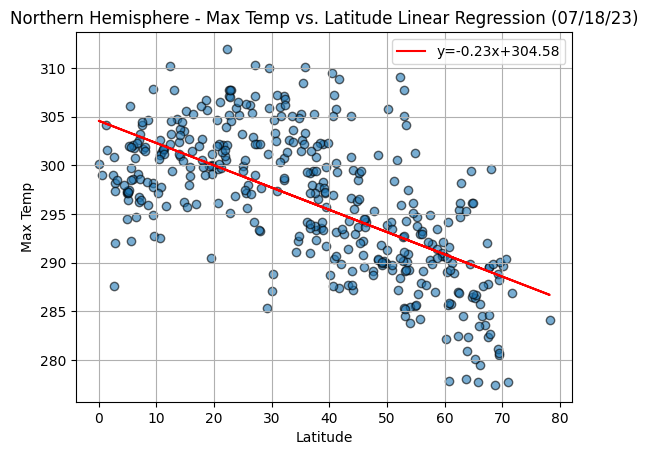

In [33]:
# Linear regression on Northern Hemisphere
f_linear_regression_plots(northern_hemi_df['Lat'].astype(float), northern_hemi_df['Max Temp'].astype(float), "Latitude",
             "Max Temp", f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({time.strftime('%D')})", "output_data/Fig_NH_Lat_v_Temp")


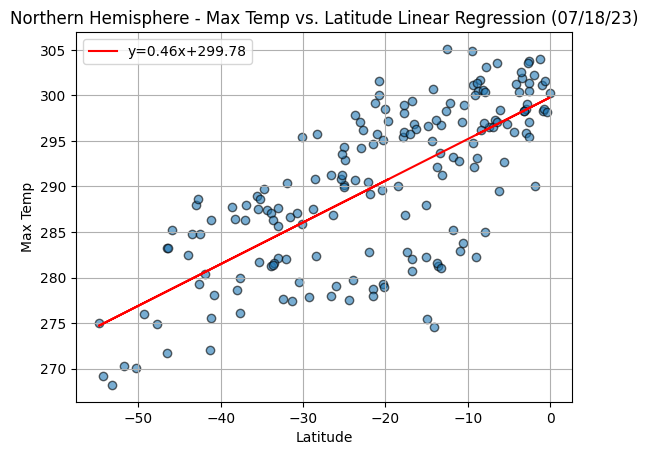

In [34]:
# Linear regression on Southern Hemisphere
f_linear_regression_plots(southern_hemi_df['Lat'].astype(float), southern_hemi_df['Max Temp'].astype(float), "Latitude",
             "Max Temp", f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({time.strftime('%D')})", "output_data/Fig_SH_Lat_v_Temp")


**Discussion about the linear relationship:** 
The purpose of these linear regressions is to analyze the connection between latitudes and temperatures. It is observed that there is a clear relationship between maximum temperatures and the distance from the equator. The R-squared value, which indicates the extent to which the data points deviate from the regression line, demonstrates the strength of this correlation. The R-values confirm that the regression line accurately represents the correlation between latitude and temperatures. This correlation can be attributed to the fact that the sun is closest to the equator and farthest from the Earth's poles.

### Humidity vs. Latitude Linear Regression Plot

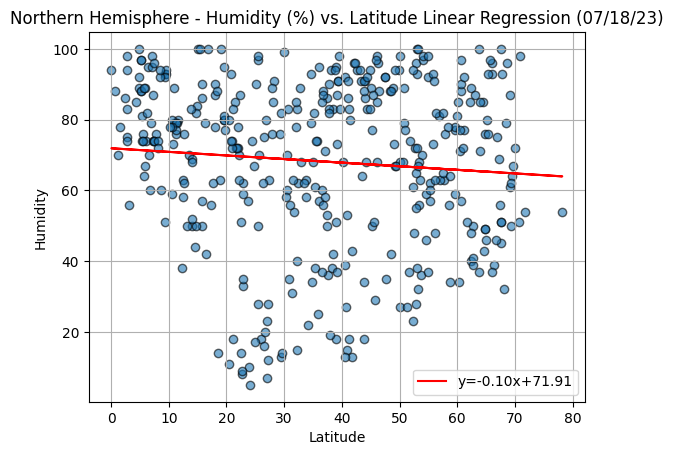

In [36]:
# Northern Hemisphere
f_linear_regression_plots(northern_hemi_df['Lat'].astype(float), northern_hemi_df['Humidity'].astype(float), "Latitude",
             "Humidity", f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "output_data/NH_Lat_v_Hum")

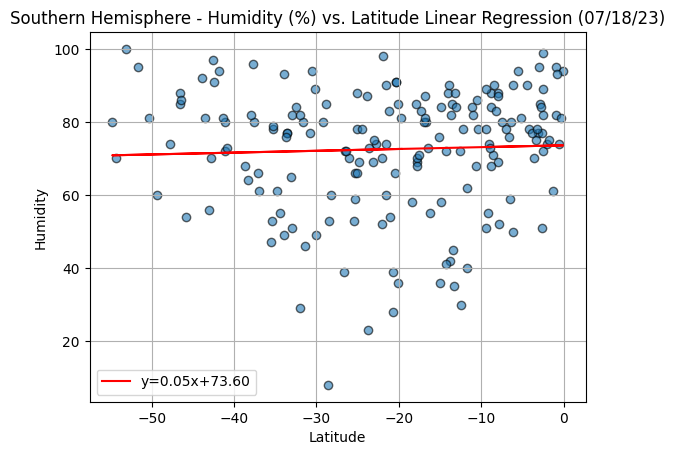

In [37]:
# Southern Hemisphere
f_linear_regression_plots(southern_hemi_df['Lat'].astype(float), southern_hemi_df['Humidity'].astype(float), "Latitude",
             "Humidity", f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "output_data/SH_Lat_v_Hum")

**Discussion about the linear relationship:** 
The purpose of these linear regressions is to analyze the connection between latitudes and humidity. It is observed that there is a limited correlation between humidity and latitudes. The R-squared value, which represents the variability of data points around the regression line, indicates a significant level of variability in this relationship. The R-values suggest that there is substantial variability between the linear regression line and the actual data points. As one approaches the equator, there is a slight tendency for humidity to increase, which can explain why Virgin Daqueris in the Philippines accumulate more condensation compared to those in Anchorage.

### Cloudiness vs. Latitude Linear Regression Plot

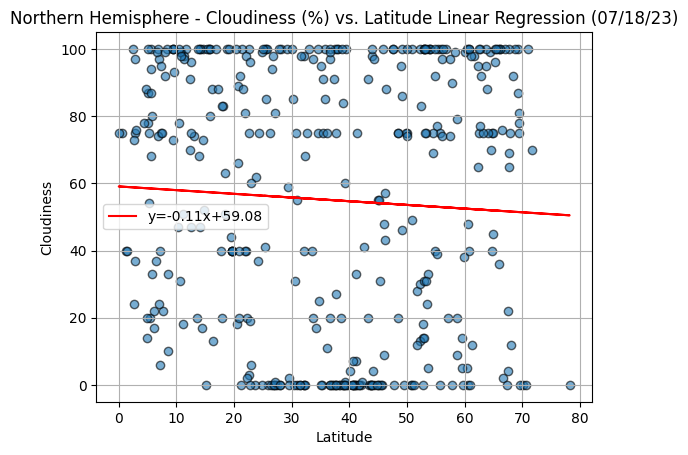

In [38]:
# Northern Hemisphere
f_linear_regression_plots(northern_hemi_df['Lat'].astype(float), northern_hemi_df['Cloudiness'].astype(float), "Latitude",
             "Cloudiness", f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "output_data/NH_Lat_v_Cloud")

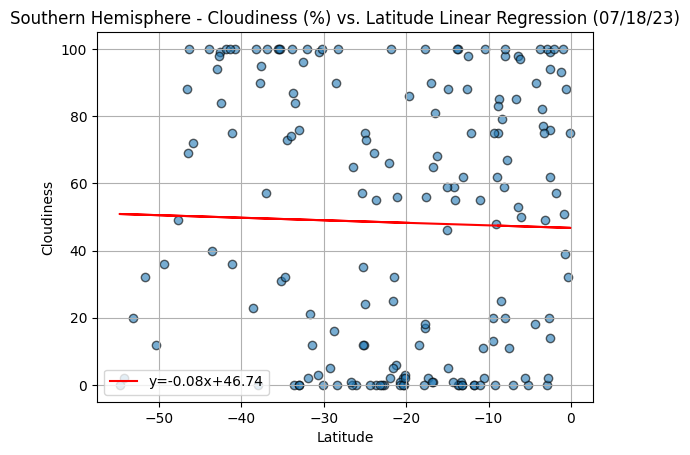

In [39]:
# Southern Hemisphere
f_linear_regression_plots(southern_hemi_df['Lat'].astype(float), southern_hemi_df['Cloudiness'].astype(float), "Latitude",
             "Cloudiness", f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "output_data/SH_Lat_v_Cloud")

**Discussion about the linear relationship:** 
The purpose of these linear regressions is to examine the relationship between latitudes and cloud coverage. It is evident that there is virtually no correlation between cloud coverage and latitudes. The R-squared value, which represents the variability of data points around the regression line, indicates a significant level of variability in this relationship. The R-values suggest that there is substantial variability between the linear regression line and the actual data points. Based on the data and the graph, it can be concluded that there is no relationship between these two datasets.

### Wind Speed vs. Latitude Linear Regression Plot

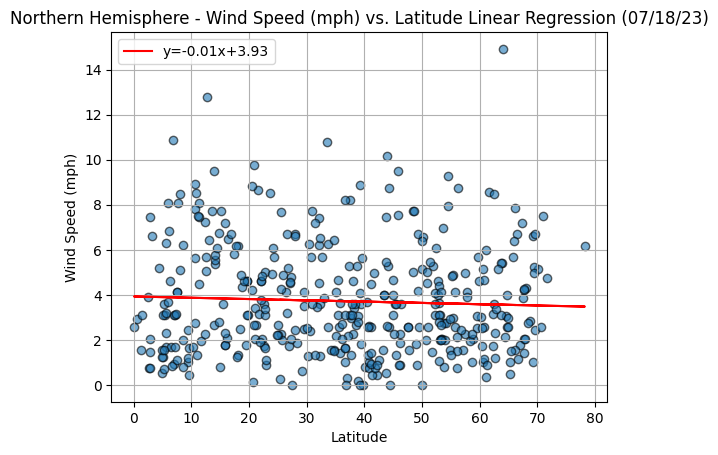

In [40]:
# Northern Hemisphere
f_linear_regression_plots(northern_hemi_df['Lat'].astype(float), northern_hemi_df['Wind Speed'].astype(float), "Latitude",
             "Wind Speed (mph)", f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "output_data/NH_Lat_v_Wind")

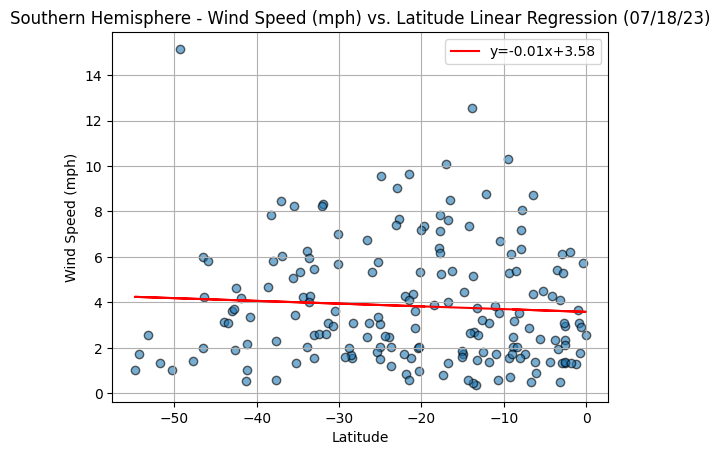

In [41]:
# Southern Hemisphere
f_linear_regression_plots(southern_hemi_df['Lat'].astype(float), southern_hemi_df['Wind Speed'].astype(float), "Latitude",
             "Wind Speed (mph)", f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({time.strftime('%D')})",
            "output_data/SH_Lat_v_Wind")

**Discussion about the linear relationship:** 
The purpose of these linear regressions is to analyze the connection between latitudes and wind speeds. It is observed that there is very little correlation between wind speeds and latitudes. The R-squared value, which represents the variability of data points around the regression line, indicates a significant level of variability in this relationship. The R-values suggest that there is substantial variability between the linear regression line and the actual data points. Based on the data and the graph, it can be concluded that there is no relationship between these two datasets.